# まずライブラリで確認

https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html　参照

In [1]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

# スクラッチ実装

In [10]:
import math
class Kernel_d_estimator():
    
    def __init__(self):
        
        pass
    
    def _gauss_kernel(self,xi, xj, band):
        
        return np.exp((-1 * (np.abs(xi - xj)**2))/(2 * (band**2)))
    
        
    def _cal_dense(self,x):
        norm = 1/((2 * math.pi * (self.band**2))**0.5)
        return norm * np.sum(self._gauss_kernel(x, self.X, self.band))/self.X_size
    
    def fit(self,X):
        self.X = X
        self.X_size = X.shape[0]

    def predict(self, test, band):
        self.band = band
        return [self._cal_dense(t) for t in test]
        
        
        

In [11]:
ker = Kernel_d_estimator()

In [12]:
ker.fit(X.flatten())

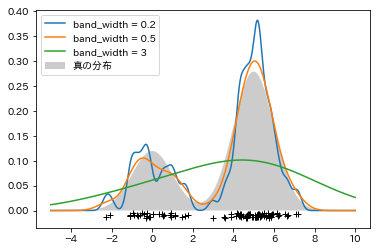

In [14]:
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='真の分布')


for i in [0.2,0.5,3]:
    y = ker.predict(X_plot, i)
    ax.plot(X_plot[:, 0],y,label="band_width = {0}".format(i))
    
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.savefig('../fig/figure.png')
plt.show()